# Introduction to Statistical Learning - Chapter 2

## Exercise 9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

(a) To begin, load in the Boston data set.

In [2]:
boston = pd.read_csv('datasets/boston.csv')

How many rows are in this data set? How many columns?

In [3]:
boston.shape

(506, 15)

(b) Make some pairwise scatterplots of the predictors (columns) in this data set.

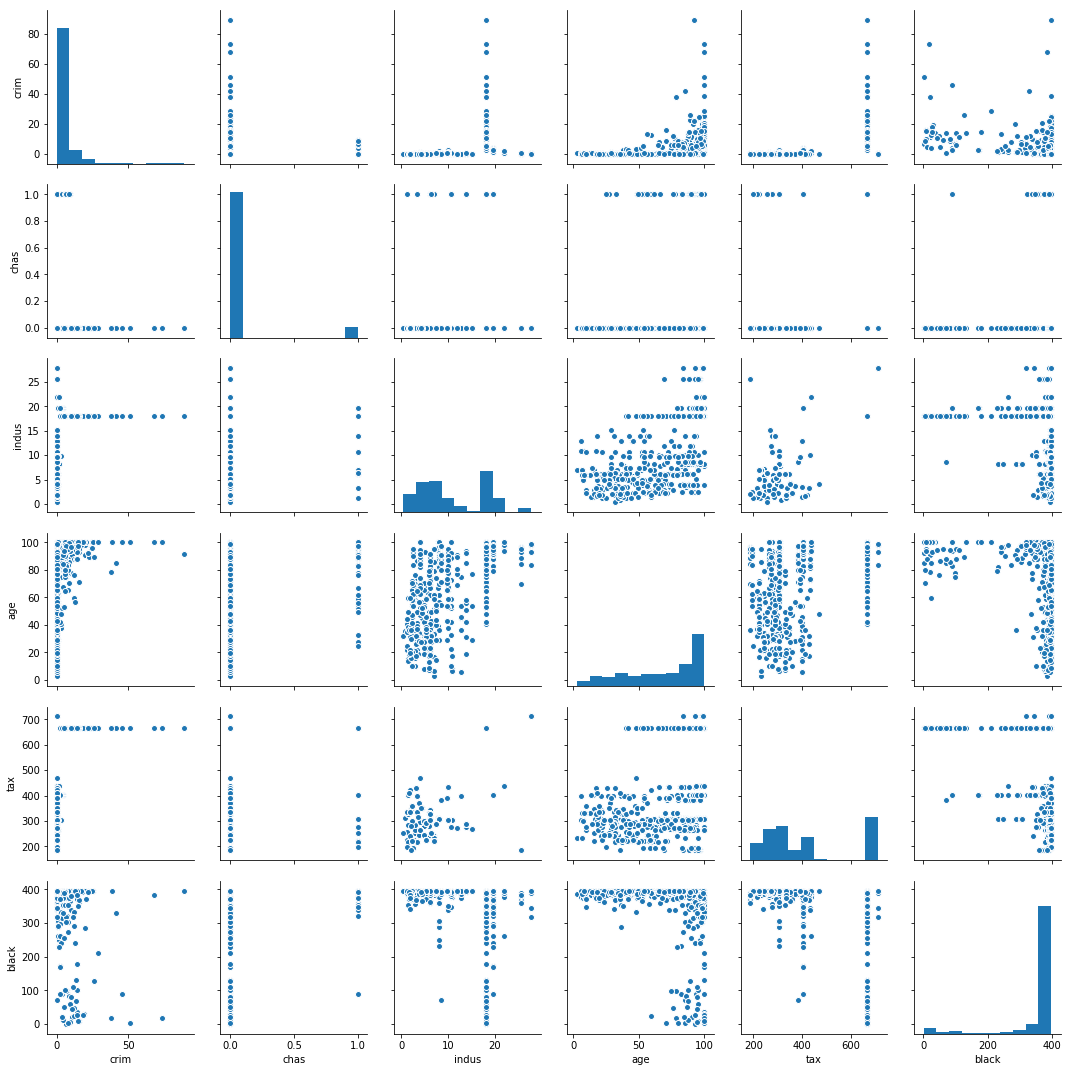

In [4]:
sns.pairplot(boston, vars=['crim', 'chas', 'indus', 'age', 'tax', 'black']);

(c) Are any of the predictors associated with per capita crime rate?

In [9]:
boston['crim_high'] = boston.crim > 10

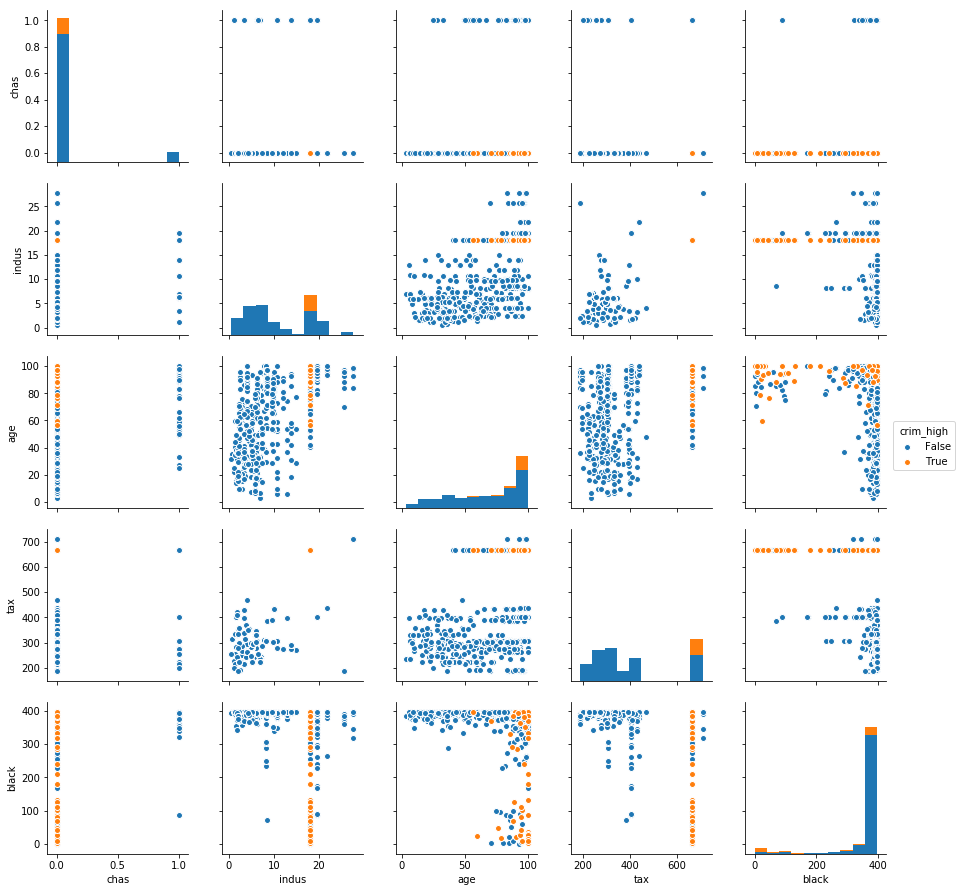

In [11]:
sns.pairplot(boston, vars=['chas', 'indus', 'age', 'tax', 'black'], hue='crim_high');

(d) Do any of the suburbs of Boston appear to have particularly high crime rates?

In [19]:
boston.sort_values(by='crim', ascending=False).head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_high
380,381,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4,True
418,419,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8,True
405,406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0,True
410,411,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0,True
414,415,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0,True


 Tax rates? Pupil-teacher ratios?

In [23]:
boston.sort_values(by='tax', ascending=False).head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_high
492,493,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1,False
491,492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6,False
490,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1,False
489,490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0,False
488,489,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2,False
405,406,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0,True
452,453,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1,False
456,457,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7,False
455,456,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,False
454,455,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9,False


In [25]:
boston.sort_values(by='ptratio', ascending=False).head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_high
354,355,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2,False
355,356,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6,False
135,136,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96,18.1,False
127,128,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19,16.2,False
136,137,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,378.25,16.90,17.4,False
141,142,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41,14.4,False
139,140,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,17.8,False
138,139,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,21.2,392.04,21.32,13.3,False
137,138,0.35233,0.0,21.89,0,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59,17.1,False
140,141,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437,21.2,388.08,24.16,14.0,False


(e) How many of the suburbs in this data set bound the Charles river?

In [29]:
boston[boston.chas == 1].size

560

(f) What is the median pupil-teacher ratio among the towns in this data set?

In [32]:
boston.ptratio.median()

19.05

(g) Which suburb of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors?

In [36]:
boston.sort_values(by='age').head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_high
41,42,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6,False
74,75,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,394.92,6.78,24.1,False
73,74,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,7.54,23.4,False
43,44,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7,False
70,71,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2,383.73,6.72,24.2,False
42,43,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3,False
252,253,0.08221,22.0,5.86,0,0.431,6.957,6.8,8.9067,7,330,19.1,386.09,3.53,29.6,False
72,73,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8,False
243,244,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7,False
253,254,0.36894,22.0,5.86,0,0.431,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8,False


(h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?

In [40]:
(boston.rm > 7).sum()

64

In [42]:
(boston.rm > 8).sum()

13